# Jet Substructure
Jet substructure is currently a very popular tool to analyze jets that are produced from heavy objects such as top quarks, Higgs bosons, W/Z bosons, or any beyond-Standard-Model hadronically-decaying objects.

An excellent overview of jet substructure techniques can be found here:

[Boosted objects: a probe of beyond the Standard Model physics](http://arxiv.org/abs/1012.5412) by Abdesselam et al.
You will also be looking at several "jet grooming" algorithms, which attempt to reduce the impact of "soft" contributions to clustering sequence by adding some other criteria.You will be investigating three types of groomers :

   * **Soft Drop**:
      * Removes wide-angle, soft radiation from the jet.
      * Procedure:
         * Recluster the jet with the Cambridge-Aachen algorithm. 
         * Undo the last clustering step to form two subjets. 
         * Drop the lower $p_{\mathrm{T}}$ subjet if the "soft drop" condition is not met:
            * $\frac{\mathrm{min}(p_{\mathrm{T}1}, p_{\mathrm{T}2})}{p_{\mathrm{T}1}+p_{\mathrm{T}2}} > z_{\mathrm{cut}} \left(\frac{\Delta R_{12}}{R_0}\right)^{\beta}$
         * Repeat with the higher-$p_{\mathrm{T}}$ subjet until the soft drop condition is met.
      * [Original paper](https://arxiv.org/abs/1402.2657).
   * **Pruning**:
      * Like soft drop, removes wide-angle, soft radiation from the jet.
      * While reclustering the jet with the CA algorithm, discard softer particle when $\Delta R>R_{\mathrm{prune}}$ and min$(p_{\mathrm{T}1}, p_{\mathrm{2}T}) <\epsilon_{\mathrm{prune}}(p_{\mathrm{T}1}+p_{\mathrm{T}2}))$
      * [Recombination Algorithms and Jet Substructure: Pruning as a Tool for Heavy Particle Searches](http://arxiv.org/abs/1303.4811)

The following are older algorithms that are not often used anymore (not in MiniAOD, can be recomputer with the jet toolbox):
   * **Trimming**:
      * Reclusters jets with kT algorithm with a smaller R-parameter, throwing away soft contributions
      * [Jet Trimming](http://arxiv.org/abs/0912.1342)
   * **Filtering**:
      * Clusters jet with Cambridge-Aachen algorithm with a smaller R-parameter, declusters until a large drop in subjet mass is found
      * [Jet substructure as a new Higgs search channel at the LHC](http://arxiv.org/abs/arXiv:0802.2470)

You will also be investigating several algorithms to identify ("tag") highly-boosted massive SM particles such as W, Z, H bosons and top quarks. These involve utilizing substructure and kinematic information of subjets to "tag" these particles.You will be investigating two types of identification algorithms ("taggers"):
   * **CMS Top Tagger Algorithm**, based on the JHU Top Tagger Algorithm:
      * Clusters jet with Cambridge-Aachen algorithm, declusters recursively until 3 or 4 hard subjets are found
      * [Top-tagging: A Method for Identifying Boosted Hadronic Tops](http://arxiv.org/abs/arXiv:0806.0848)
      * [A Cambridge-Aachen (C-A) based Jet Algorithm for boosted top-jet tagging](http://inspirehep.net/record/925377)
   * **N-subjettiness**:
      * Looks for the "lumpiness" (or in this case "subjettiness") of jets
      * [Maximizing Boosted Top Identification by Minimizing N-subjettiness](http://arxiv.org/abs/arXiv:1108.2701).
   * For further reading, several measurements have been performed about jet substructure:
      * [Studies of jet mass in dijet and W/Z+jet events]](http://arxiv.org/abs/1303.4811) (CMS).
      * [Jet mass and substructure of inclusive jets in sqrt(s) = 7 TeV pp collisions with the ATLAS experiment](http://arxiv.org/abs/1203.4606) (ATLAS).


## Jet types and algorithms available in CMS

   * [This twiki](https://twiki.cern.ch/twiki/bin/view/CMSPublic/SWGuideDataFormatRecoJets) summarizes the respective labels by which each jet collection can be retrieved from the event record for general AOD files.

   * For the MINIAOD, there are three main jet collections as described [here](https://twiki.cern.ch/twiki/bin/view/CMSPublic/WorkBookMiniAOD2015#Analyzing_MiniAOD).
      * slimmedJets :
         * AK4 jets
         * Using charged hadron subtraction
         * b-tagging applied
         * Jet corrections applied
         * Pileup jet ID info embedded.
         * Quark/gluon likelihood info embedded.
      * slimmedJetsPUPPI :
         * Also AK4 jets, but using PUPPI instead of charged hadron subtraction
      * slimmedJetsAK8 :
         * Several jet grooming techniques applied (modified mass drop tagging aka soft drop beta=0, filtering, pruning, trimming)
         * CMS top tagging algorithm
         * n-subjettiness algorithm
         * Access to subjets (soft drop and CMS top tagger, respectively)

Now, let's compare the jet masses for ungroomed, pruned, soft drop (SD), PUPPI, and SD+PUPPI: 

In [14]:
%%bash
python $CMSSW_BASE/src/Analysis/JMEDAS/scripts/jmedas_make_histograms.py --files=$CMSSW_BASE/src/Analysis/JMEDAS/data/MiniAODs/RunIIFall17MiniAODv2/rsgluon_ttbar_3000GeV.txt --outname=$CMSSW_BASE/src/Analysis/JMEDAS/notebooks/files/rsgluon_ttbar_3000GeV.root --maxevents=2000 --maxFiles 10 --maxjets=2 --correctJets Fall17_17Nov2017_V32_MC


Added root://cmsxrootd.fnal.gov//store/mc/RunIIFall17MiniAODv2/RSGluonToTT_M-3000_TuneCP5_13TeV-pythia8/MINIAODSIM/PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/100000/F63F74AC-83B3-E811-ADA7-FA163E277177.root
Added root://cmsxrootd.fnal.gov//store/mc/RunIIFall17MiniAODv2/RSGluonToTT_M-3000_TuneCP5_13TeV-pythia8/MINIAODSIM/PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/100000/E642002E-75B2-E811-A031-FA163ECEEDC1.root
Added root://cmsxrootd.fnal.gov//store/mc/RunIIFall17MiniAODv2/RSGluonToTT_M-3000_TuneCP5_13TeV-pythia8/MINIAODSIM/PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/100000/E0AB2D2B-12B5-E811-8DBA-EC0D9A82260E.root
Added root://cmsxrootd.fnal.gov//store/mc/RunIIFall17MiniAODv2/RSGluonToTT_M-3000_TuneCP5_13TeV-pythia8/MINIAODSIM/PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/100000/C47E6912-D8C9-E811-A893-FA163E444CC8.root
Added root://cmsxrootd.fnal.gov//store/mc/RunIIFall17MiniAODv2/RSGluonToTT_M-3000_TuneCP5_13TeV-pythia8/MINIAODSIM/PU2017_12Apr2018_94X_mc2017_realistic_v14-v1/1000

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


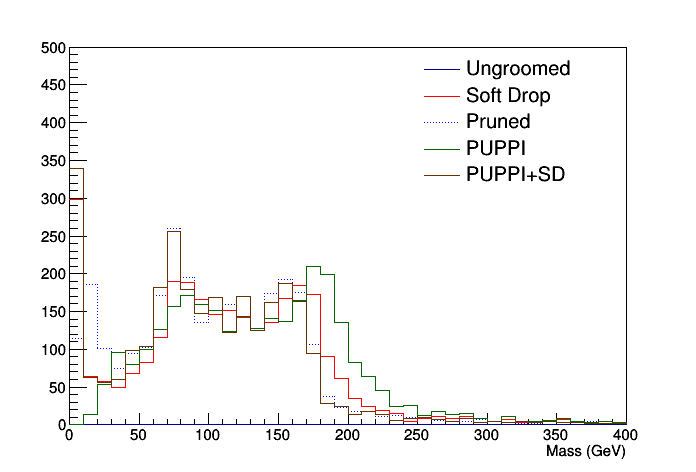

In [18]:
import ROOT
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
f = ROOT.TFile("$CMSSW_BASE/src/Analysis/JMEDAS/notebooks/files/rsgluon_ttbar_3000GeV.root")

h_mAK8   = f.Get("h_mAK8")
h_msoftdropAK8 = f.Get("h_msoftdropAK8")
h_mprunedAK8   = f.Get("h_mprunedAK8")
h_mpuppiAK8 = f.Get("h_mpuppiAK8")
h_mSDpuppiAK8 = f.Get("h_mSDpuppiAK8")

h_msoftdropAK8.SetLineColor(2)
h_mprunedAK8.SetLineColor(4) 
h_msoftdropAK8.SetLineColor(2)
h_mprunedAK8.SetLineStyle(3) 
h_mpuppiAK8.SetLineColor(ROOT.kGreen+3)
h_mSDpuppiAK8.SetLineColor(ROOT.kOrange+3)

leg = ROOT.TLegend(0.6, 0.6, 0.88, 0.88)
leg.SetFillColor(0)
leg.SetBorderSize(0)
leg.AddEntry( h_mAK8, "Ungroomed", 'l')
leg.AddEntry( h_msoftdropAK8, "Soft Drop", 'l')
leg.AddEntry( h_mprunedAK8, "Pruned", 'l')
leg.AddEntry( h_mpuppiAK8, "PUPPI", 'l')
leg.AddEntry( h_mSDpuppiAK8, "PUPPI+SD", 'l')

c = ROOT.TCanvas('c', 'c')
h_mprunedAK8.SetMaximum(500)
h_mprunedAK8.Draw()
h_mprunedAK8.GetXaxis().SetRangeUser(0, 400)
h_mprunedAK8.GetYaxis().SetRangeUser(0, 500)
h_msoftdropAK8.Draw("same") 
h_mAK8.Draw("same") 
h_mpuppiAK8.Draw("same")
h_mSDpuppiAK8.Draw("same")
#h_mprunedAK8.SetMaximum(h_msoftdropAK8.GetMaximum()*1.2)

leg.Draw()

c.Draw()


<details>
<summary>
    <font color='blue'>The histogram should look like this:</font>
</summary>
<img src="files/ex5_rsg_jetmass.png" width=400px/>
</details>
Note that the histogram has two peaks. What do these correspond to? How do the algorithms affect the relative size of the two populations?

## Tops vs. W bosons
Now let's compare the soft drop mass distributions for two samples: SM $t\bar{t}$ and the RSG with m=3 TeV. If you've already run over the $t\bar{t}$ sample, you can skip the histogram-making step.

In [ ]:
%%bash
python $CMSSW_BASE/src/Analysis/JMEDAS/scripts/jmedas_make_histograms.py --files=$CMSSW_BASE/src/Analysis/JMEDAS/data/MiniAODs/RunIIFall17MiniAODv2/ttjets.txt --outname=$CMSSW_BASE/src/Analysis/JMEDAS/notebooks/files/ttjets.root --maxevents=2000 --maxjets=6 --maxFiles 5


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


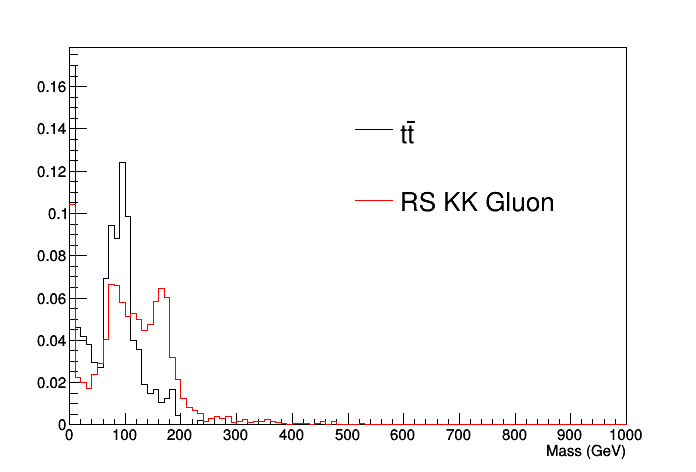

In [22]:
f1 = ROOT.TFile("files/ttjets.root")
f2 = ROOT.TFile("files/rsgluon_ttbar_3000GeV.root")

h_msoftdropAK8_1 = f1.Get("h_msoftdropAK8")
h_msoftdropAK8_2 = f2.Get("h_msoftdropAK8")

h_msoftdropAK8_1.SetLineColor(1)
h_msoftdropAK8_2.SetLineColor(2)

leg = ROOT.TLegend(0.5, 0.5, 0.8, 0.8)
leg.SetFillColor(0)
leg.SetBorderSize(0)
leg.AddEntry( h_msoftdropAK8_1, "t#bar{t}", 'l')
leg.AddEntry( h_msoftdropAK8_2, "RS KK Gluon", 'l')

h_msoftdropAK8_1.Sumw2()
h_msoftdropAK8_1.Scale( 1.0 / h_msoftdropAK8_1.Integral() )
h_msoftdropAK8_2.Sumw2()
h_msoftdropAK8_2.Scale( 1.0 / h_msoftdropAK8_2.Integral() )

c = ROOT.TCanvas('c', 'c') 
h_msoftdropAK8_1    .Draw("hist")
h_msoftdropAK8_2    .Draw("same hist")
h_mAK8.GetXaxis().SetRangeUser(0, 200)


leg.Draw()

c.Draw()


Again, can you explain all of the peaks you see? Why is it that there are no boosted top quarks in the $t\bar{t}$ sample, but there are in the RS KK gluon sample?


## Subjet Mass
We can also take a look inside the AK8 jets by reclustering the jet constituents as AK4 jets. For boosted top quarks, we can expect to see evidence of the $W$ boson and $b$ quark inside the jet; on the other hand, QCD jets will not have such structure. 

In [ ]:
f1 = ROOT.TFile("files/qcd_300to470.root")
f2 = ROOT.TFile("files/rsgluon_ttbar_3000GeV.root")

h_mSubjet0AK8_1 = f1.Get("h_mSubjet0AK8")
h_mSubjet0AK8_2 = f2.Get("h_mSubjet0AK8")

h_mSubjet0AK8_1.SetLineColor(1)
h_mSubjet0AK8_2.SetLineColor(2)

leg = ROOT.TLegend(0.5, 0.5, 0.8, 0.8)
leg.SetFillColor(0)
leg.SetBorderSize(0)
leg.AddEntry(h_mSubjet0AK8_1, "QCD", 'l')
leg.AddEntry(h_mSubjet0AK8_2, "RSG#rightarrow t#bar{t}", 'l')

h_mSubjet0AK8_1.Sumw2()
h_mSubjet0AK8_1.Scale( 1.0 / h_mSubjet0AK8_1.Integral() )
h_mSubjet0AK8_2.Sumw2()
h_mSubjet0AK8_2.Scale( 1.0 / h_mSubjet0AK8_2.Integral() )

c = ROOT.TCanvas('c', 'c', 800, 600) 
h_mSubjet0AK8_1.Draw("hist")
h_mSubjet0AK8_2.Draw("same hist")

leg.Draw()
c.Draw()

h_mSubjet1AK8_1 = f1.Get("h_mSubjet1AK8")
h_mSubjet1AK8_2 = f2.Get("h_mSubjet1AK8")

h_mSubjet1AK8_1.SetLineColor(1)
h_mSubjet1AK8_2.SetLineColor(2)

leg2 = ROOT.TLegend(0.5, 0.5, 0.8, 0.8)
leg2.SetFillColor(0)
leg2.SetBorderSize(0)
leg2.AddEntry( h_mSubjet1AK8_1, "QCD", 'l')
leg2.AddEntry( h_mSubjet1AK8_2, "RSG#rightarrow t#bar{t}", 'l')

h_mSubjet1AK8_1.Sumw2()
h_mSubjet1AK8_1.Scale( 1.0 / h_mSubjet1AK8_1.Integral() )
h_mSubjet1AK8_2.Sumw2()
h_mSubjet1AK8_2.Scale( 1.0 / h_mSubjet1AK8_2.Integral() )

c2 = ROOT.TCanvas('c2', 'c2') 
h_mSubjet1AK8_1.Draw("hist")
h_mSubjet1AK8_2.Draw("same hist")

leg2.Draw()

c2.Draw()


# $\rho$ parameter
A useful variable for massive, fat jets is the QCD scaling parameter $\rho$, defined as:

$\rho=m^2/(p_{\mathrm{T}}R)^2$.

(Sometimes $\rho$ is defined as the logarithm of this quantity). One useful feature of this variable is that QCD jet mass grows with $p_{\mathrm{T}}$, i.e. the two quantities are strongly correlated, while $\rho$ is much less correlated with $p_{\mathrm{T}}$ (see [slides](http://www.hri.res.in/~sangam/sangam18/talks/Marzani-2.pdf)). 


In [ ]:
f1 = ROOT.TFile("files/ttjets.root")
f2 = ROOT.TFile("files/rsgluon_ttbar_3000GeV.root")

h_rhoRatioAK8_1 = f1.Get("h_rhoRatioAK8")
h_rhoRatioAK8_2 = f2.Get("h_rhoRatioAK8")

h_rhoRatioAK8_1.SetLineColor(1)
h_rhoRatioAK8_2.SetLineColor(2)

leg = ROOT.TLegend(0.3, 0.5, 0.5, 0.8)
leg.SetFillColor(0)
leg.SetBorderSize(0)
leg.AddEntry( h_rhoRatioAK8_1, "t#bar{t}", 'l')
leg.AddEntry( h_rhoRatioAK8_2, "RS KK Gluon", 'l')

h_rhoRatioAK8_1.Sumw2()
h_rhoRatioAK8_1.Scale( 1.0 / h_rhoRatioAK8_1.Integral() )
h_rhoRatioAK8_2.Sumw2()
h_rhoRatioAK8_2.Scale( 1.0 / h_rhoRatioAK8_2.Integral() )

c = ROOT.TCanvas('c', 'c') 
h_rhoRatioAK8_1.Draw("hist")
h_rhoRatioAK8_2.Draw("same hist")

leg.Draw()

c.Draw()

